# **Histopathologic Cancer Detection: EDA**
Saloni Sharma

***

# About the Project
The project is based on the Kaggle competition for cancer detection in images. The task is a classification task to predict the probability with which an image shows cancer. Specifically, images are 96 x 96 pixels, but the cancer only shows in the center 32 x 32 pixels of the image. 

This notebook includes the initial exploratory data analysis and visualization.

In [1]:
# Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from glob import glob
import os

# **Load Data**

Files provided with competition:
*   **train**: data set of images
*   **test**: data set of images
*   **train_labels.csv**: true labels for 'train' images
*   **sample_submission.csv**: example of what solution should look like

In [25]:
# Load Training Data

# store paths to image files
path_to_train = "../input/histopathologic-cancer-detection/train/"
df = pd.DataFrame({'path': glob(os.path.join(path_to_train,'*.tif'))})

# set the id for each image (same as filename) based on path
df['id'] = df['path'].map(lambda x: x.split('/')[4].split(".")[0])

# load the labels for train data
path_to_labels = "../input/histopathologic-cancer-detection/train_labels.csv"
labels = pd.read_csv(path_to_labels)

# add labels to corresponding image filenames (id)
train_df = df.merge(labels, on = "id") 

In [26]:
train_df.shape #(number of training images, columns)

(220025, 3)

In [27]:
train_df.head(3)

,path,id,label
0,../input/histopathologic-cancer-detection/trai...,d43c081bafa286f9c1f7e921883f26ceafebc912,1
1,../input/histopathologic-cancer-detection/trai...,092d0eedebce504847715ee046b6ad74b57599b4,0
2,../input/histopathologic-cancer-detection/trai...,b0d2582c6218a8764323fc940b41312282b99bf4,0


In [19]:
# Load Test Data

# load test images
path_to_test = "../input/histopathologic-cancer-detection/test/"
test_df = pd.DataFrame({'path': glob(os.path.join(path_to_test,'*.tif'))})

# get the id for each image (same as filename)
test_df['id'] = test_df['path'].map(lambda x: x.split('/')[4].split(".")[0])

# no processing, so save test dataframe to a .csv file
test_df.to_csv("test_df.csv", index=False)

In [20]:
test_df.shape 

(57458, 2)

In [22]:
test_df.head(3)

,path,id
0,../input/histopathologic-cancer-detection/test...,a7ea26360815d8492433b14cd8318607bcf99d9e
1,../input/histopathologic-cancer-detection/test...,59d21133c845dff1ebc7a0c7cf40c145ea9e9664
2,../input/histopathologic-cancer-detection/test...,5fde41ce8c6048a5c2f38eca12d6528fa312cdbb


# **Data Visualization**

Display some images from the training data set along with their correct labels to check for any patterns.

In [41]:
# get all image file names
allImageFilePaths = list(train_df['path'])
# choose 8 random images
randImagePaths = np.random.choice(allImageFilePaths, 8)

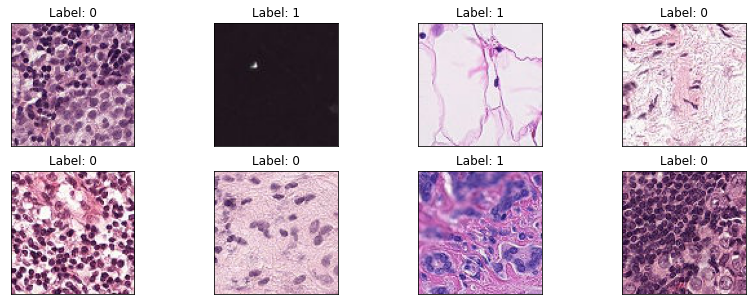

In [42]:
fig = plt.figure(figsize=(14, 5))

# display images
for i in range(8):
    # add a plot for each image (and remove tick labels)
    ax = fig.add_subplot(2, 8//2, i+1, xticks=[], yticks=[])
    # open file as image and display image
    img = Image.open(randImagePaths[i])
    plt.imshow(img) 
    # get corresponding label for current id
    img_id = randImages[i].split('.')[0]
    img_label = train_df.label.loc[train_df['id'] == img_id].values[0]
    # print label above image
    ax.set_title(f'Label: {img_label}')

# **Exploratory Data Analysis**

In the training data, 89117 images show cancer, and 130908 show no cancer.

That means 40.5% of the data is labelled positive for cancer.


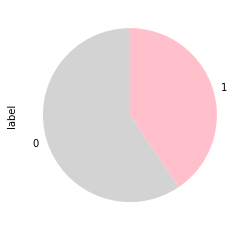

In [43]:
# How many images in training set show cancer? 

label1 = str( train_df['label'].value_counts()[1] )
label0 = str( train_df['label'].value_counts()[0] )
label1_percent = round( int(label1)/len(train_df.label), 3) * 100

print(f"In the training data, {label1} images show cancer, and {label0} show no cancer.\n")
print("That means " + str(label1_percent) + "% of the data is labelled positive for cancer.")

train_df.label.value_counts().plot.pie(colors=['lightgrey', 'pink'], startangle=90);

In [65]:
# Are there any "outlier" images?

allWhite, allBlack = [], []

for imageFilePath in allImageFilePaths:
    # convert image to np array with rgb numbers
    imageArray = np.array(Image.open(imageFilePath))

    if np.all(imageArray == 0): #all white images
        imageFile = imageFilePath.split('/')[4]
        print("All White:", imageFile)
        allWhite.append(imageFile)  

    elif np.all(imageArray == 255): #all black images
        imageFile = imageFilePath.split('/')[4]
        print("All Black:", imageFile)
        allBlack.append(imageFile)  

All White: 9369c7278ec8bcc6c880d99194de09fc2bd4efbe.tif
All Black: 54df3640d17119486e5c5f98019d2a92736feabc.tif


In [66]:
# There were only two "outlier" images, but I will still remove them from the training data

# get indices for the images to remove
allWhiteIndex = train_df[train_df.id == allWhite[0].split('.')[0]].index[0]
allBlackIndex = train_df[train_df.id == allBlack[0].split('.')[0]].index[0]
# drop images 
train_df.drop(index=[allWhiteIndex, allBlackIndex], inplace=True)

In [67]:
train_df.shape

(220023, 3)

In [68]:
# Save train dataframe to a .csv file
train_df.to_csv("train_df.csv", index=False)

***
# Resources

Competition page: https://www.kaggle.com/c/histopathologic-cancer-detection/overview/description

For loading data: https://www.kaggle.com/gomezp/complete-beginner-s-guide-eda-keras-lb-0-93

Data visualization (displaying images): https://www.kaggle.com/artgor/simple-eda-and-model-in-pytorch